# Cross Validation

We may test our model on hypothetical data by dividing our datasets into train and test sets. But it's possible that the split we received was a lucky (or unlucky) accident and doesn't accurately reflect the model's performance. We'll implement a method called cross-validation to address this issue, in which we test and train the model using the full dataset and then assess it as a whole.


Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.






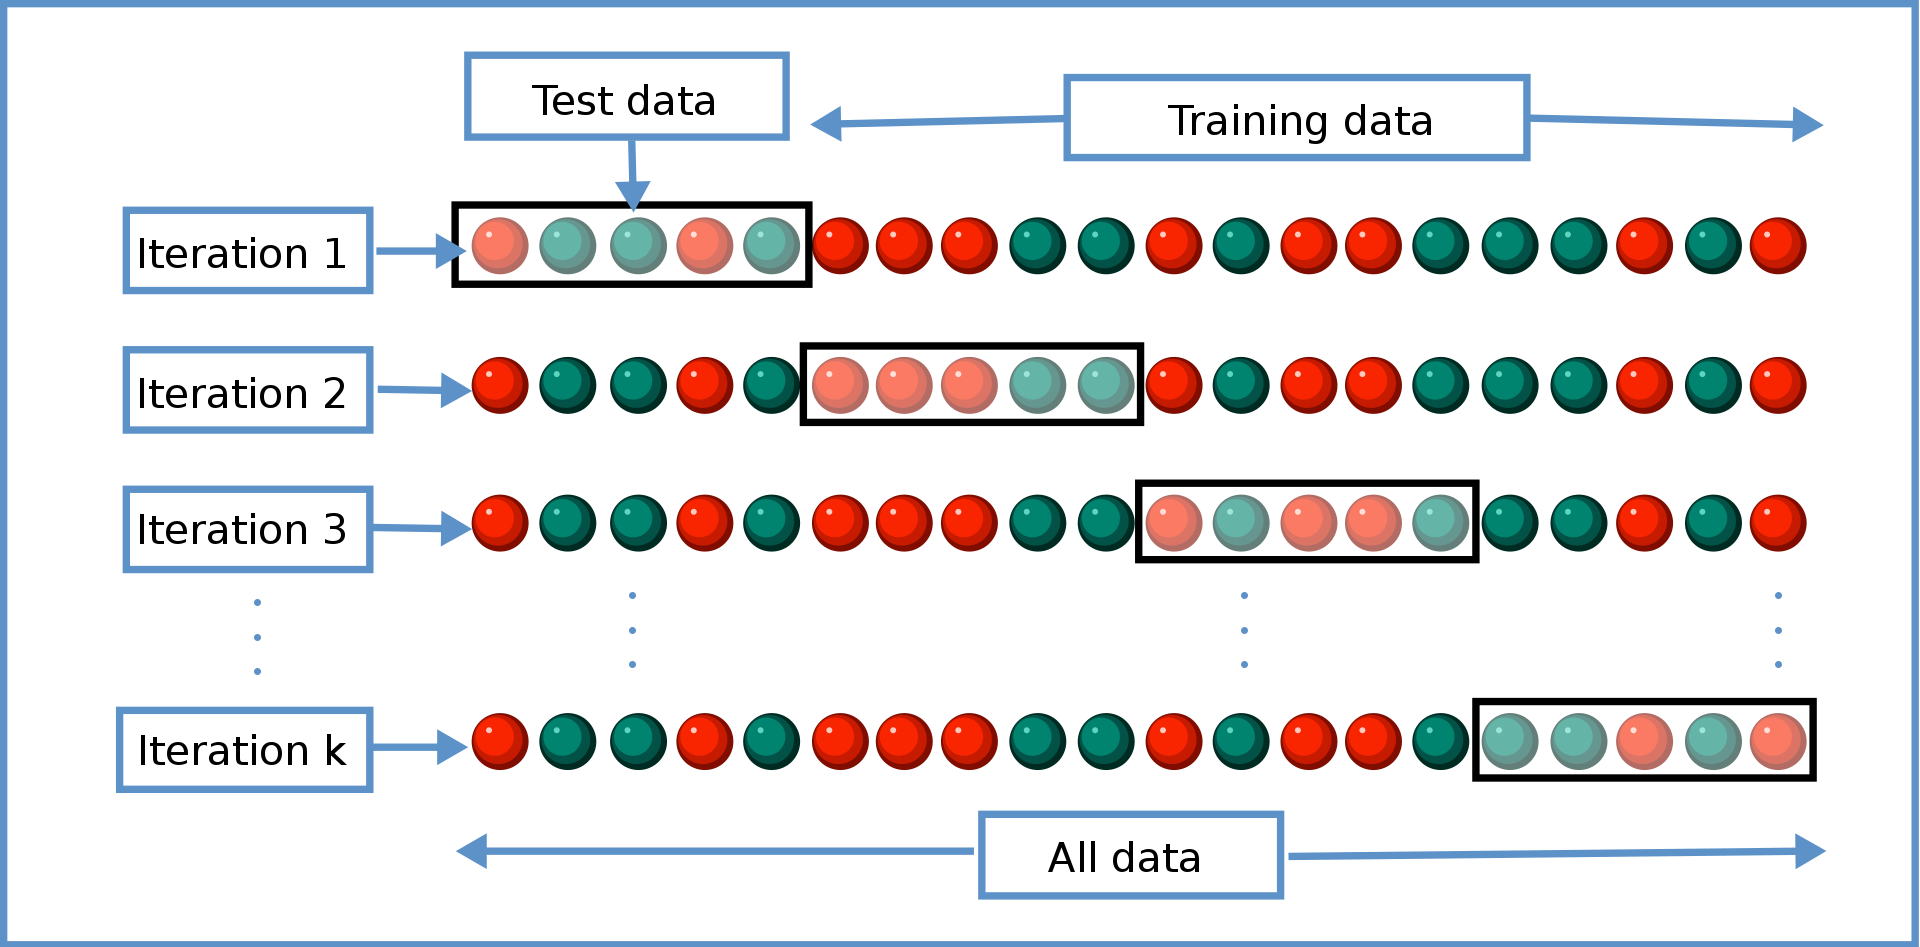

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, svm, metrics, model_selection

In [ ]:
x, y = datasets.load_breast_cancer(return_X_y=True)

In [ ]:
# Define a function to split our dataset into train/test splits using indices


def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

## K-Fold

K-Fold is validation technique in which we split the data into k-subsets and the holdout method is repeated k-times where each of the $k$ subsets are used as test set and other $k-1$ subsets are used for the training purpose.




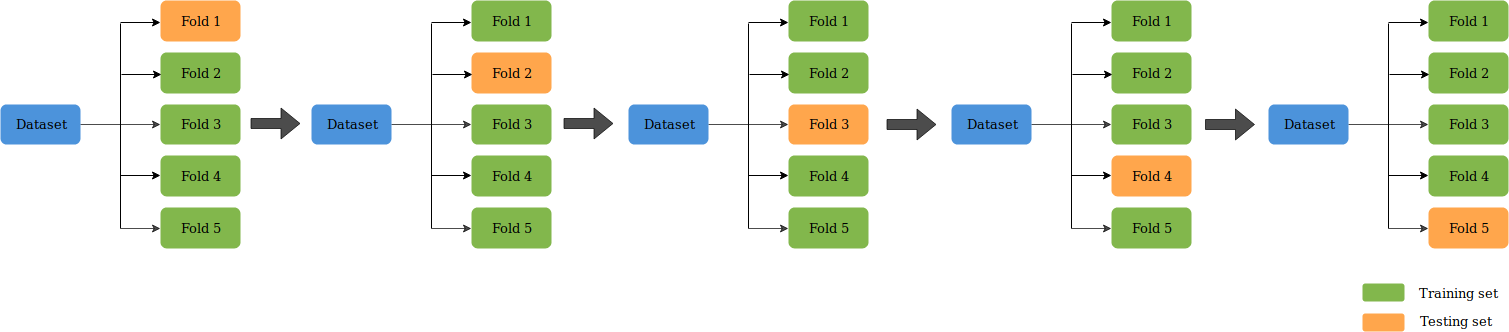

In [ ]:
k_fold = model_selection.KFold(
    n_splits=10
)  # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []
for train_indices, test_indices in k_fold.split(x):
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        train_indices, 
                                                        test_indices)

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

    
    

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.701754,0.392857,1.000000,0.564103
1,0.912281,0.875000,1.000000,0.933333
2,0.912281,0.918919,0.944444,0.931507
3,0.894737,0.828571,1.000000,0.906250
4,0.964912,0.935484,1.000000,0.966667
5,0.982456,0.978261,1.000000,0.989011
6,0.947368,0.952381,0.975610,0.963855
7,0.947368,0.955556,0.977273,0.966292
8,0.912281,0.953488,0.931818,0.942529
9,0.982143,0.977273,1.000000,0.988506


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.915758
precision    0.876779
recall       0.982915
F1           0.915205
dtype: float64

## Shuffle Split

KFold will divide your data set into prespecified number of folds, and every sample must be in one and only one fold. A fold is a subset of your dataset. ShuffleSplit will randomly sample your entire dataset during each iteration to generate a training set and a test set.

The `ShuffleSplit` iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the `random_state` pseudo random number generator. 

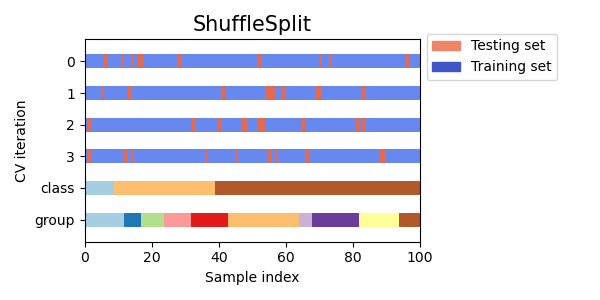

In [ ]:
shuffle_k_fold = model_selection.ShuffleSplit(
    n_splits=10, random_state=42
)  # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in shuffle_k_fold.split(x):
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.982456,0.975610,1.000000,0.987654
1,0.894737,0.857143,1.000000,0.923077
2,0.912281,0.868421,1.000000,0.929577
3,0.842105,0.857143,0.923077,0.888889
4,0.894737,0.860465,1.000000,0.925000
5,0.947368,0.918919,1.000000,0.957746
6,0.912281,0.894737,0.971429,0.931507
7,0.947368,0.928571,1.000000,0.962963
8,0.947368,0.944444,0.971429,0.957746
9,0.894737,0.853659,1.000000,0.921053


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.917544
precision    0.895911
recall       0.986593
F1           0.938521
dtype: float64

## StratifiedKFold

Stratified K-Folds cross-validator. Provides train/test indices to split data in train/test sets. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

`StratifiedKFold` is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

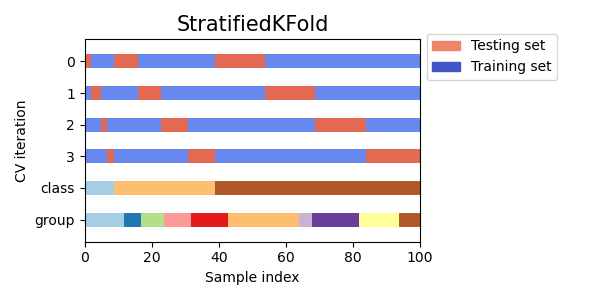

In [ ]:
stratified_k_fold = model_selection.StratifiedKFold(
    n_splits=10
)  # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_k_fold.split(
    x, y
):  # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.894737,0.853659,1.000000,0.921053
1,0.842105,0.809524,0.971429,0.883117
2,0.894737,0.894737,0.944444,0.918919
3,0.929825,0.900000,1.000000,0.947368
4,0.929825,0.900000,1.000000,0.947368
5,0.929825,0.921053,0.972222,0.945946
6,0.947368,0.945946,0.972222,0.958904
7,0.929825,0.921053,0.972222,0.945946
8,0.929825,0.944444,0.944444,0.944444
9,0.910714,0.875000,1.000000,0.933333


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.913878
precision    0.896541
recall       0.977698
F1           0.934640
dtype: float64

## Stratified Shuffle Split

Stratified ShuffleSplit cross-validator. Provides train/test indices to split data in train/test sets. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.


`StratifiedShuffleSplit` is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

Here is a visualization of the cross-validation behavior.

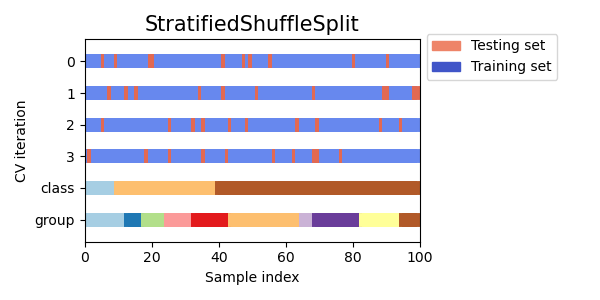

In [ ]:
 # splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.929825,0.921053,0.972222,0.945946
1,0.929825,0.921053,0.972222,0.945946
2,0.929825,0.900000,1.000000,0.947368
3,0.912281,0.878049,1.000000,0.935065
4,0.912281,0.897436,0.972222,0.933333
5,0.912281,0.878049,1.000000,0.935065
6,0.859649,0.833333,0.972222,0.897436
7,0.912281,0.897436,0.972222,0.933333
8,0.894737,0.875000,0.972222,0.921053
9,0.912281,0.897436,0.972222,0.933333


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.910526
precision    0.889884
recall       0.980556
F1           0.932788
dtype: float64